In [1]:
from scipy.signal import firwin
from numpy.fft import fft, fftshift, fftfreq
import numpy as np
import matplotlib.pyplot as plt
import scipy.signal

In [10]:
f = open("ecg_daniel1.txt","r")
raw_data = f.readline()  # con f.read() leemos todo el contenido
f.close()

array = np.genfromtxt("./ecg_daniel1.txt",skip_header = 3, usecols=(0,5))
array

array([[  0., 506.],
       [  1., 509.],
       [  2., 514.],
       ...,
       [  7., 465.],
       [  8., 460.],
       [  9., 455.]])

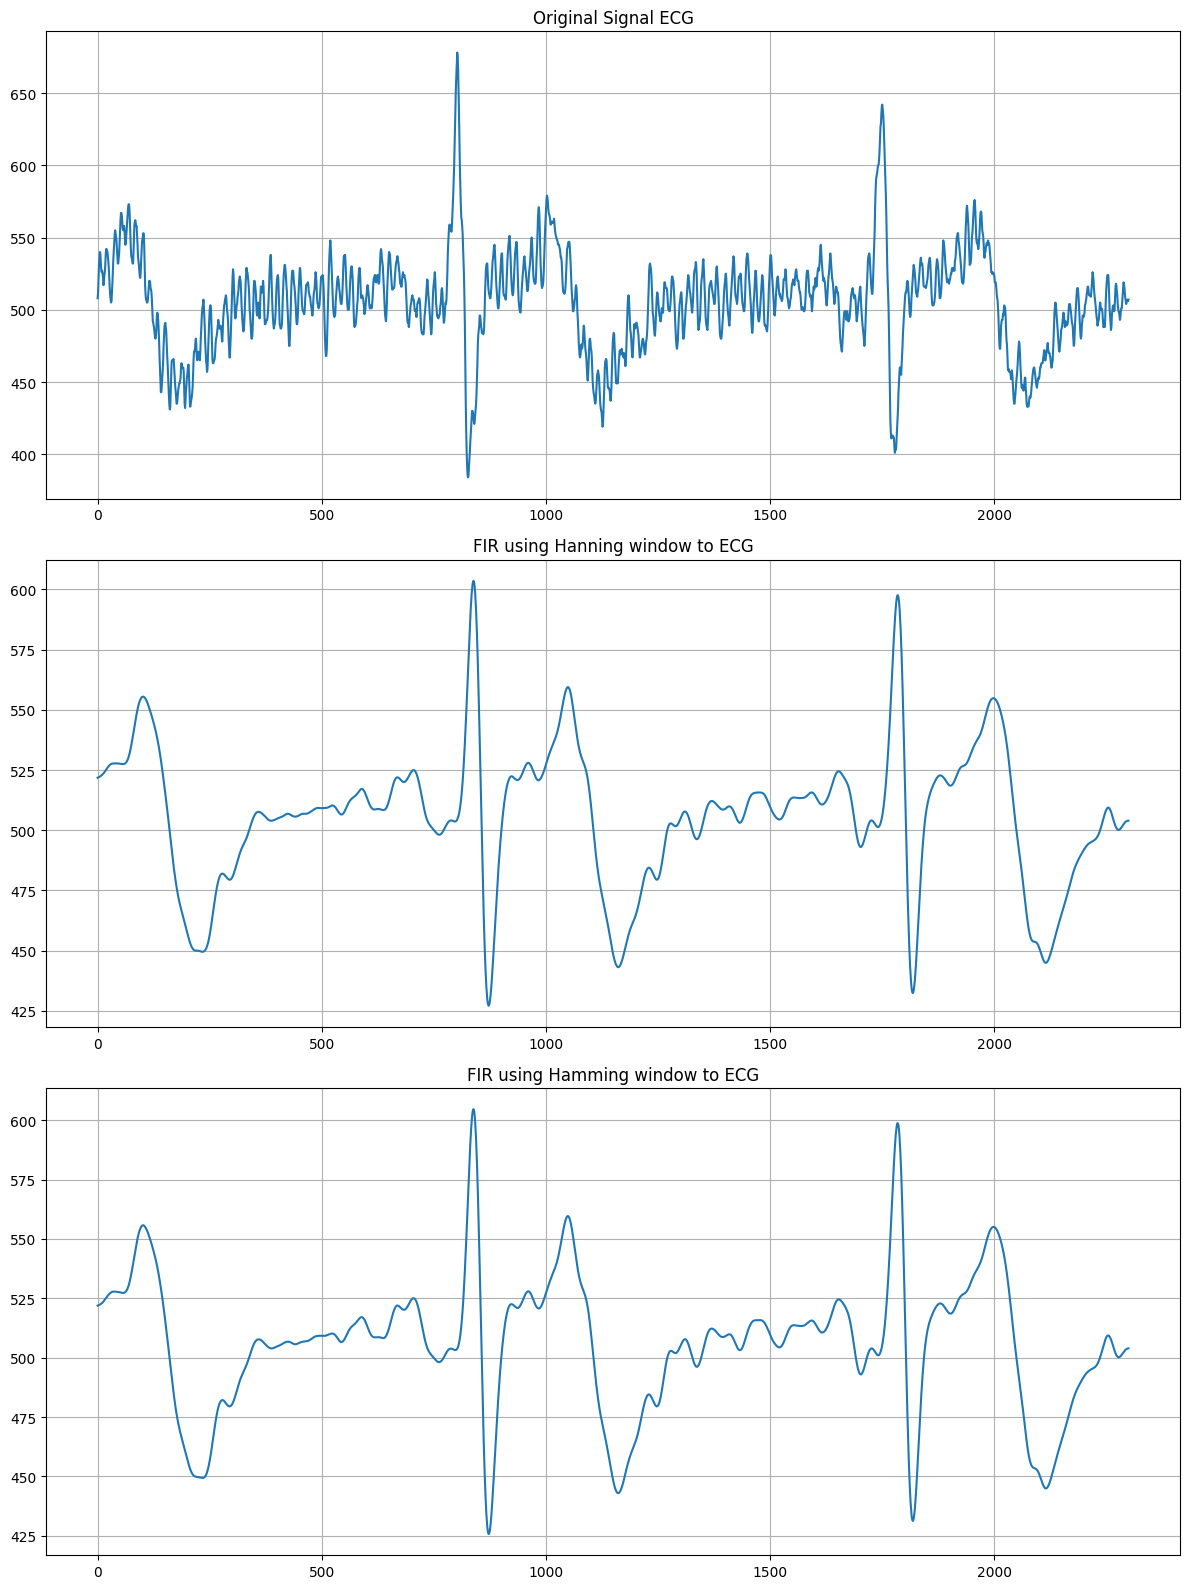

In [38]:
wp = 0.094
ws = 0.197
dw = ws-wp

wc=0.04
#I choose hanning and hamming
M_hann = int(np.floor(8/dw))
M_hamm = int(np.floor(8/dw))

h_hann = firwin(M_hann+1, wc, window='hann')
h_hamm = firwin(M_hamm+1, wc, window='hamming')

hann_filt = scipy.signal.lfilter(h_hann, 1, array[:,1])
hamm_filt = scipy.signal.lfilter(h_hamm, 1, array[:,1])

s1=np.array(len(array[:,1]))
s2=np.array(len(hann_filt))
s3=np.array(len(hamm_filt))

plt.figure(figsize=(12, 16))
plt.subplot(311)
plt.plot(array[1200:3500, 1])
plt.title("Original Signal ECG")
plt.grid(True)
plt.subplot(312)
plt.plot(hann_filt[1200:3500])
plt.title("FIR using Hanning window to ECG")
plt.grid(True)

plt.subplot(313)
plt.plot(hamm_filt[1200:3500])
plt.title("FIR using Hamming window to ECG")
plt.grid(True)

plt.tight_layout()
plt.show()

In [40]:
f = open("EEG.txt","r")
raw_data = f.readline()  # con f.read() leemos todo el contenido
f.close()

array2 = np.genfromtxt("./EEG.txt",skip_header = 3, usecols=(0,5))
array2

array([[  0., 377.],
       [  1., 505.],
       [  2., 336.],
       ...,
       [  2.,   5.],
       [  3.,   0.],
       [  4.,  46.]])

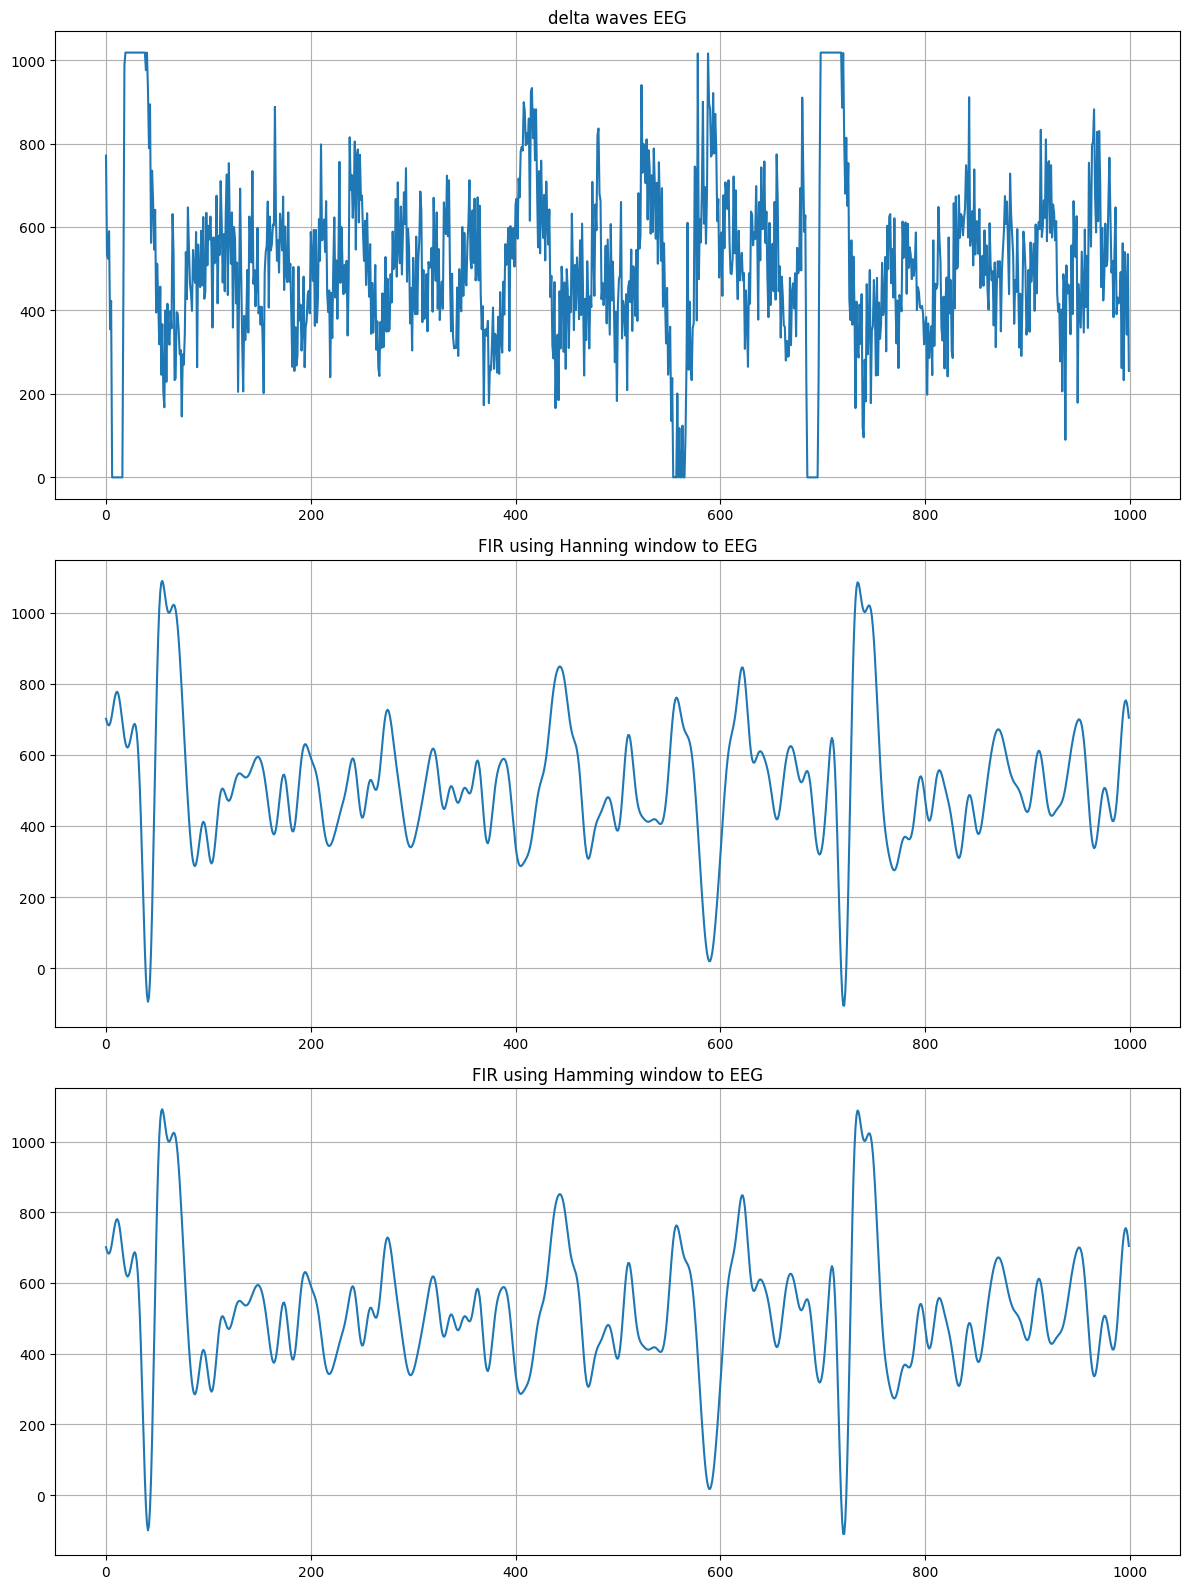

In [45]:
#ondas delta 0.1 Hz - 3.5 Hz
wp = 0.07
ws = 0.20
dw = ws-wp

wc=(wp+ws)/2
#I choose hanning and hamming
M_hann = int(np.floor(8/dw))
M_hamm = int(np.floor(8/dw))

h_hann = firwin(M_hann+1, wc, window='hann')
h_hamm = firwin(M_hamm+1, wc, window='hamming')

hann_filt2 = scipy.signal.lfilter(h_hann, 1, array2[:,1])
hamm_filt2 = scipy.signal.lfilter(h_hamm, 1, array2[:,1])

plt.figure(figsize=(12, 16))
plt.subplot(311)
plt.plot(array2[5000:6000, 1])
plt.title("delta waves EEG")
plt.grid(True)
plt.subplot(312)
plt.plot(hann_filt2[5000:6000])
plt.title("FIR using Hanning window to EEG")
plt.grid(True)

plt.subplot(313)
plt.plot(hamm_filt2[5000:6000])
plt.title("FIR using Hamming window to EEG")
plt.grid(True)

plt.tight_layout()
plt.show()

In [3]:
f = open("EMG.txt","r")
raw_data = f.readline()  # con f.read() leemos todo el contenido
f.close()

array3 = np.genfromtxt("./ecg_daniel1.txt",skip_header = 3, usecols=(0,5))
array3

array([[  0., 506.],
       [  1., 509.],
       [  2., 514.],
       ...,
       [  7., 465.],
       [  8., 460.],
       [  9., 455.]])

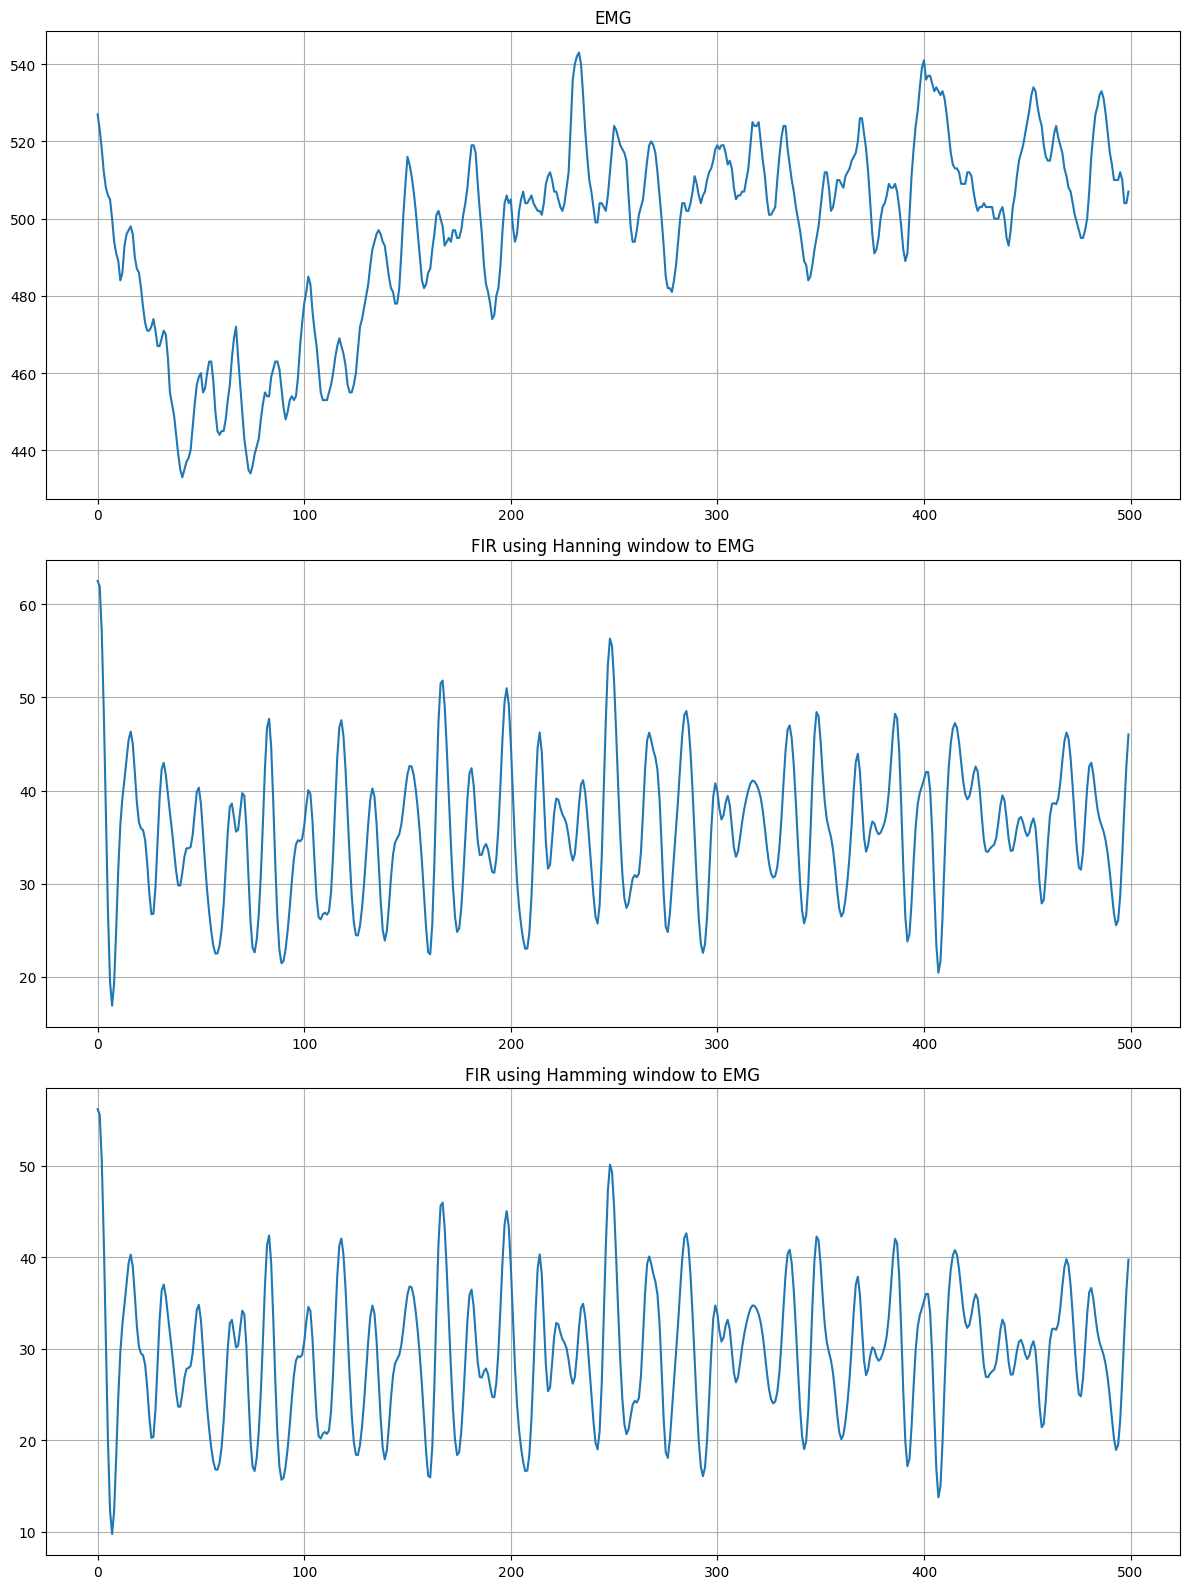

In [8]:
#EMG Fs=1000
# EMG entre 50 Hz a 150 Hz
wp3 = 0.1
ws3 = 0.06
wc3= (wp3+ws3)/2

wp4=0.3
ws4=0.36
wc4=(wp4+ws4)/2

dw3 = wc4-wc3

#I choose hanning and hamming
M_hann = int(np.floor(8/dw3))
M_hamm = int(np.floor(8/dw3))

h_hann3 = firwin(M_hann+1,[wc3 ,wc4],pass_zero=False, window='hann')
h_hamm3= firwin(M_hamm+1, [wc3 ,wc4], pass_zero=False ,window='hamming')

hann_filt3 = scipy.signal.lfilter(h_hann3, 1, array3[:,1])
hamm_filt3 = scipy.signal.lfilter(h_hamm3, 1, array3[:,1])

plt.figure(figsize=(12, 16))
plt.subplot(311)
plt.plot(array3[5000:5500, 1])
plt.title("EMG")
plt.grid(True)
plt.subplot(312)
plt.plot(hann_filt3[5000:5500])
plt.title("FIR using Hanning window to EMG")
plt.grid(True)

plt.subplot(313)
plt.plot(hamm_filt3[5000:5500])
plt.title("FIR using Hamming window to EMG")
plt.grid(True)

plt.tight_layout()
plt.show()